In [1]:
from sklearn import datasets, metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
#from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, RepeatedStratifiedKFold



#import os
#for dirname, _, filenames in os.walk('home-credit-default-risk'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
        

# 1. Import data

In [3]:
df_train = pd.read_csv('train.csv')
original_data = pd.read_csv('Churn_Modelling.csv')
df_test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. Exploratory Data Analysis (EDA)

In [4]:
df_train.shape #(total rows,total columns)

(165034, 14)

In [5]:
original_data.shape

(10002, 14)

In [11]:
df_train.head(10) #train 的前五行資料

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [36]:
original_data.head() #Churn_Modelling 的前五行資料

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [22]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [37]:
submission.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [8]:
df_train.isna().sum() #缺失值的總數

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [38]:
df_train.duplicated().sum()

0

In [10]:
original_data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [39]:
original_data.duplicated().sum()

2

In [6]:
df_train = df_train.drop('id', axis=1) #第一行id被拿掉了
original_data = original_data.drop('RowNumber', axis=1) #第一行RowNumber被拿掉了
# 各拿掉一個字資料，其餘的欄位相同，所以拼起來

In [14]:
original_data.head() #第一行RowNumber被拿掉了

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [7]:
df_train = pd.concat([df_train,original_data], axis=0) #兩份資料拼起來

In [8]:
df_train.shape 
#原本 df_train (165034, 14) 有再刪空直
#原本 original_data(10002, 14) 有再刪空直

(175036, 13)

In [9]:
df_train.duplicated().sum()

2

In [18]:
df_train.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

有重複值或缺失值，為了保持資料的唯一性，在不影響資料的情況下(例如缺失值佔很少數)，可以刪掉

In [10]:
df_train = df_train.drop_duplicates() #.drop_duplicates() 刪除重複的行

In [11]:
df_train = df_train.dropna()

In [21]:
df_train.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

處理性別、國家等字串，得出 train & test 中國家都只有三個

In [12]:
df_train['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [23]:
df_test['Geography'].unique()

array(['France', 'Germany', 'Spain'], dtype=object)

In [13]:
df_train['Gender'] = df_train['Gender'].map({'Male':1,'Female': 0 })
df_test['Gender'] = df_test['Gender'].map({'Male':1,'Female': 0 })

df_train['Geography'] = df_train['Geography'].map({'France':0,'Spain': 1,'Germany':2 })
df_test['Geography'] = df_test['Geography'].map({'France':0,'Spain': 1,'Germany':2 })

In [56]:
df_train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,1,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


random forest 

自定義的資料集不會有iris範例的data 和 target的屬性，需要自己去定義

In [25]:
df_train.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
feature = ['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target = 'Exited'
x_train, x_test, y_train, y_test = train_test_split(df_train[feature], df_train[target], test_size=0.25, random_state=4)

建立 RandomForestClassifier 分類器物件，設定參數

In [27]:
df_train[feature].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175030 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       175030 non-null  int64  
 1   CreditScore      175030 non-null  int64  
 2   Geography        175030 non-null  int64  
 3   Gender           175030 non-null  int64  
 4   Age              175030 non-null  float64
 5   Tenure           175030 non-null  int64  
 6   Balance          175030 non-null  float64
 7   NumOfProducts    175030 non-null  int64  
 8   HasCrCard        175030 non-null  float64
 9   IsActiveMember   175030 non-null  float64
 10  EstimatedSalary  175030 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 16.0 MB


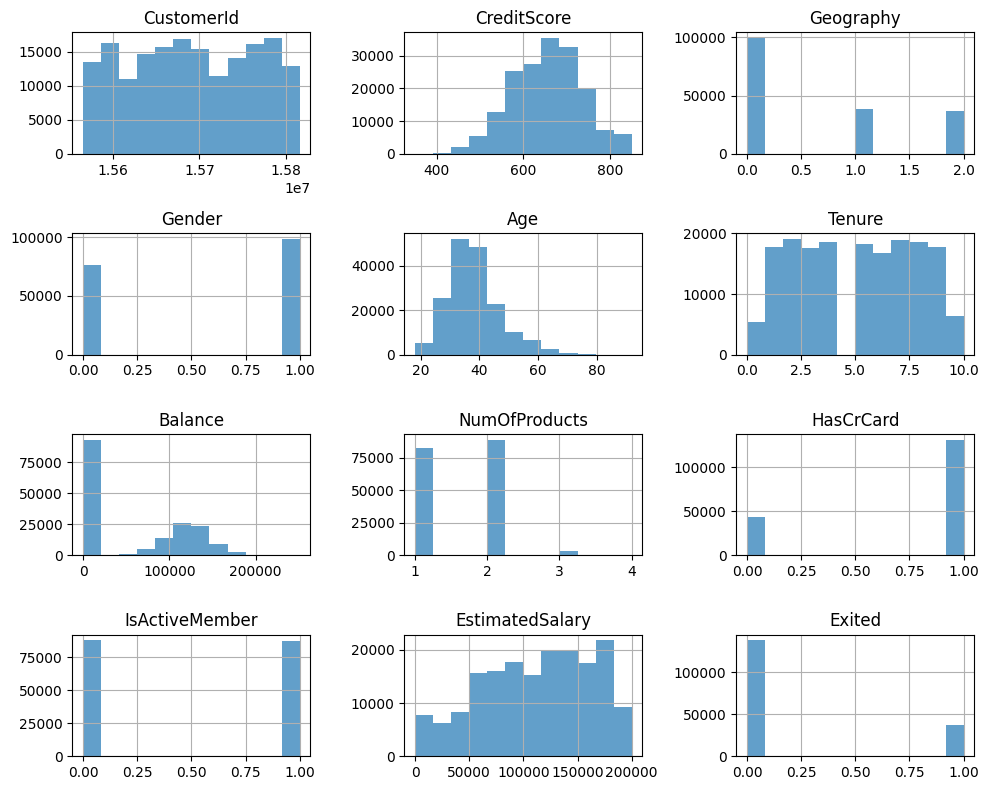

In [48]:
df_train.hist(alpha=0.7, figsize=(10, 8), bins=12) 
plt.tight_layout()
plt.show()

欄位說明
Customer ID: A unique identifier for each customer
Surname: The customer's surname or last name
Credit Score: A numerical value representing the customer's credit score
Geography: The country where the customer resides (France, Spain or Germany)
Gender: The customer's gender (Male or Female)
Age: The customer's age.
Tenure: The number of years the customer has been with the bank
Balance: The customer's account balance
NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
EstimatedSalary: The estimated salary of the customer
Exited: Whether the customer has churned (1 = yes, 0 = no)

# random forest

In [31]:
# 建立模型 (使用 20 顆樹，每棵樹的最大深度為 4)
clf = RandomForestClassifier(n_estimators=100)
#訓練
clf.fit(x_train, y_train)
#預測測試集
y_pred=clf.predict(x_test)

In [32]:
# 預測的acc得分
acc = metrics.accuracy_score(y_test, y_pred)
print('acc:',acc)

acc: 0.8598199186434481


In [20]:
#-> Iris資料集中的特徵名稱的指令
print(df_train.columns)

#-> 陣列，其中包含了每個特徵的重要性分數(越大表對該特徵對預測的貢獻越大)
print("Feature importance: ", clf.feature_importances_)

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')
Feature importance:  [3.80846494e-04 1.64501400e-03 9.12586315e-02 2.61436730e-02
 3.37638346e-01 2.09805140e-04 3.38017867e-02 3.64197126e-01
 3.34068563e-04 1.43358606e-01 1.03209717e-03]


# 預測成功的比例

In [29]:
# 預測成功的比例
print('訓練集: ',clf.score(x_train,y_train))
print('測試集: ',clf.score(x_test,y_test))

訓練集:  0.8399734901578402
測試集:  0.842154577448695


# Logistic Regression

In [49]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np
import pandas as pd

In [50]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(df_train[feature], df_train[target], test_size=0.1, random_state=4)

# 建立一個線性回歸模型
logistic = linear_model.LogisticRegression()

# 將訓練資料丟進去模型訓練
logistic.fit(x_train, y_train)
#logistic.fit(X, y)

# 將測試資料丟進模型得到預測結果
y_log_pred = logistic.predict(x_test)

print("迴歸係數:", logistic.coef_)
print("截距:", logistic.intercept_ )


#print('confusion matrix')
#print(pd.crosstab(preds, titanic["Survived"]))
print('accuracy')
print(logistic.score(x_train, y_train))

迴歸係數: [[-1.09923492e-07 -3.54207112e-09  1.90661962e-10 -1.12168167e-10
   4.70908331e-09 -8.57348792e-11  4.90181193e-06 -1.53640608e-10
  -1.34086995e-11 -1.62999855e-10  8.91922068e-07]]
截距: [4.6522109e-14]
accuracy
0.7890456874059685


In [51]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_log_pred))

Mean squared error: 0.21


# 使用random forest

In [52]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,2,1,38.0,10,121263.62,1,1.0,0.0,139431.00


In [54]:
df_test.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [57]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,2,1,38.0,10,121263.62,1,1.0,0.0,139431.00


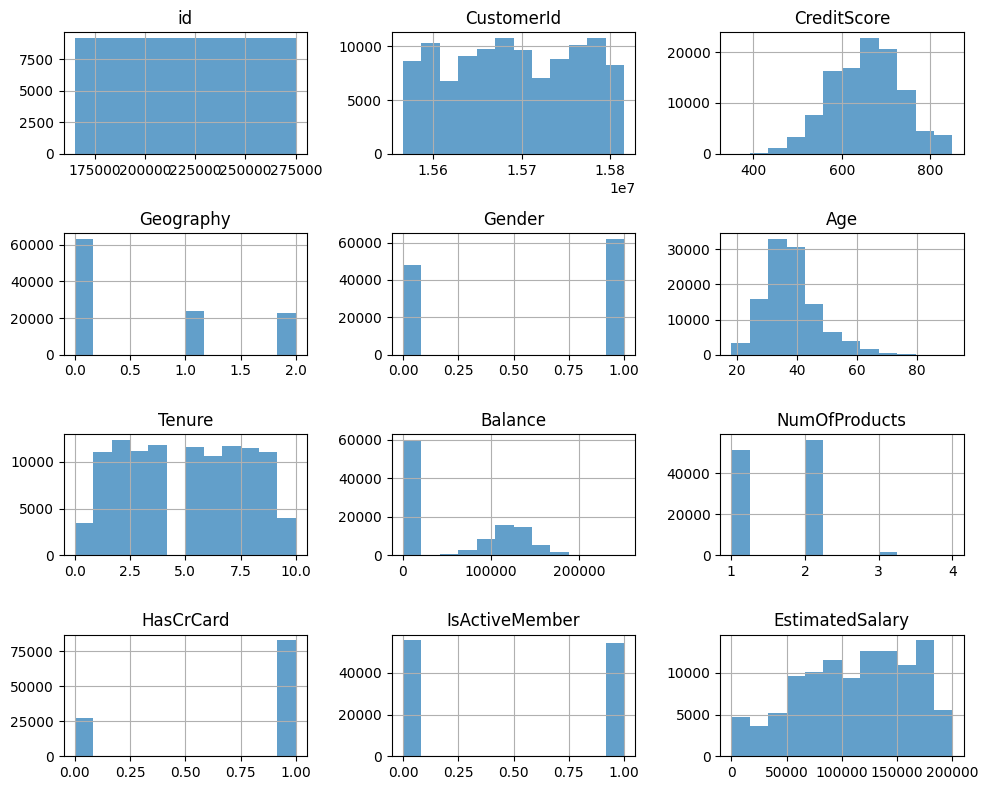

In [55]:
df_test.hist(alpha=0.7, figsize=(10, 8), bins=12) 
plt.tight_layout()
plt.show()

In [60]:
clf.predict(df_test[feature])

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
df_output=df_test[['id']]
df_output['Exited']=clf.predict(df_test[feature])
print(df_output)

            id  Exited
0       165034       0
1       165035       1
2       165036       0
3       165037       0
4       165038       0
...        ...     ...
110018  275052       0
110019  275053       0
110020  275054       0
110021  275055       0
110022  275056       0

[110023 rows x 2 columns]


C:\Users\88697\AppData\Local\Temp\ipykernel_22624\157557983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output['Exited']=clf.predict(df_test[feature])


In [71]:
df_output.to_csv('output.csv',index=False)